In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("/content/sample_data/california_housing_train.csv")
test = pd.read_csv("/content/sample_data/california_housing_test.csv")

df = pd.concat([train, test])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


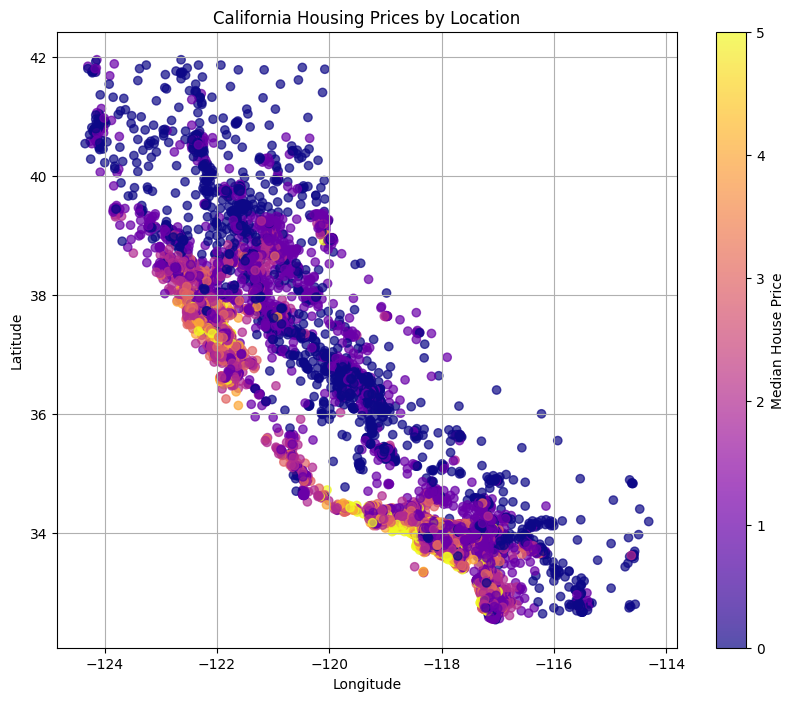

In [10]:
x = df['longitude']
y = df['latitude']
value = df['median_house_value']

price_bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, float('inf')]
colors = sns.color_palette("viridis", len(price_bins) - 1)

color_idx = pd.cut(value, bins=price_bins, labels=range(len(price_bins) - 1))

plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=color_idx, cmap='plasma', alpha=0.7)
plt.colorbar(label='Median House Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices by Location')
plt.grid(True)
plt.show()

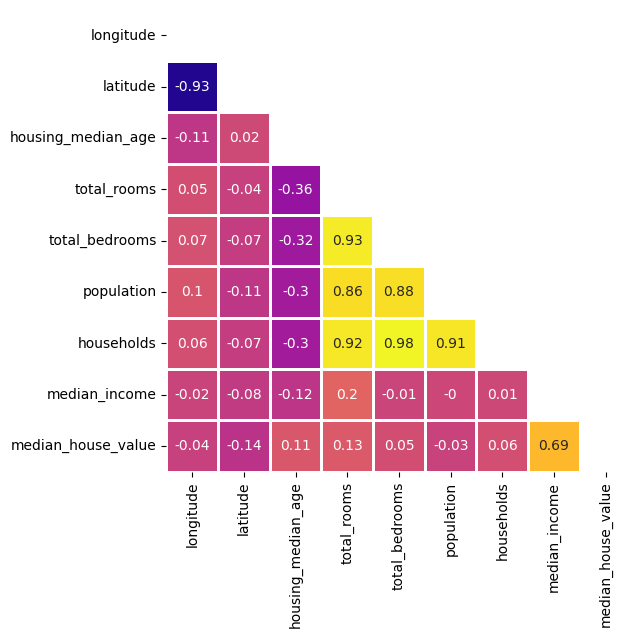

In [ ]:
corr_mat = df.corr().round(2)
f, ax = plt.subplots(figsize=(6,6))
mask = np.zeros_like(corr_mat,dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0,
            cmap='plasma',square=False,lw=2,annot=True,cbar=False)
plt.show()
# median income has shown to display the strongest correlation against median house value

In [23]:
new = pd.DataFrame()
new['position'] = np.sqrt((df['longitude'] + df['latitude'])*(df['longitude'] + df['latitude']))
new['value'] = np.log(df['median_house_value'])
new.corr()

,position,value
position,1.000000,0.563118
value,0.563118,1.000000


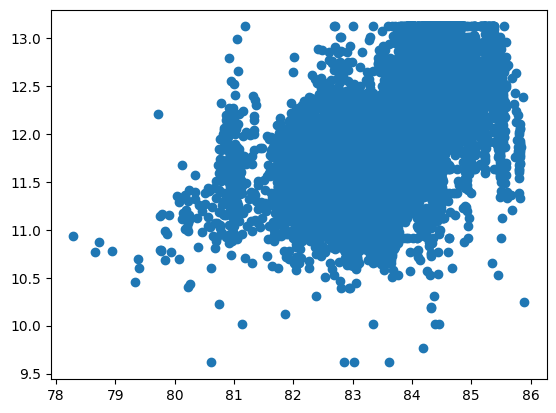

In [24]:
plt.scatter(new['position'], new['value'])

array([[<Axes: title={'center': 'position'}>,
        <Axes: title={'center': 'value'}>]], dtype=object)

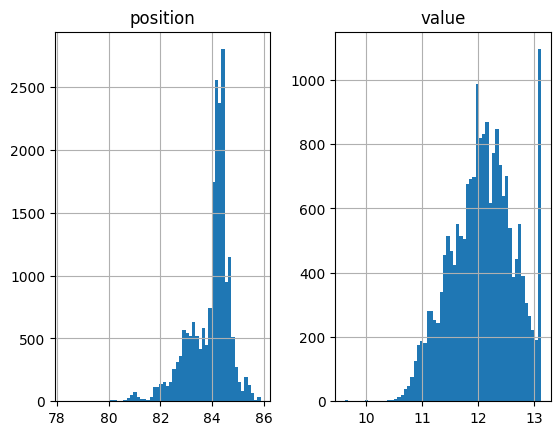

In [28]:
new.hist(bins=60)

In [29]:
df['position'] = np.sqrt((df['longitude'] + df['latitude'])*(df['longitude'] + df['latitude']))
df['value'] = np.log(df['median_house_value'])

In [31]:
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a))

    return d

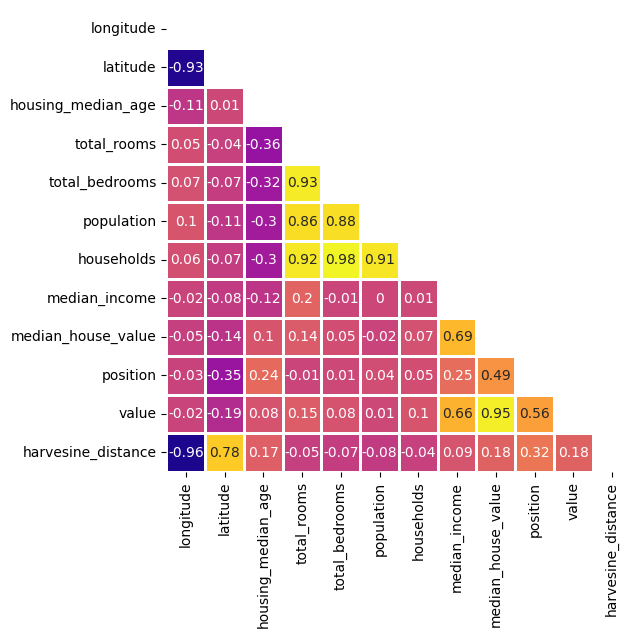

In [34]:
corr_mat = df.corr().round(2)
f, ax = plt.subplots(figsize=(6,6))
mask = np.zeros_like(corr_mat,dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0,
            cmap='plasma',square=False,lw=2,annot=True,cbar=False)
plt.show()
# median income has shown to display the strongest correlation against median house value

In [32]:
df['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(df.longitude, df.latitude)]

In [33]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,position,value,harvesine_distance
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,80.12,11.110954,12221.324718
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,80.07,11.291031,12229.785501
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,80.87,11.358608,12257.349741
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,80.93,11.203679,12259.612459
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,81.00,11.089805,12261.521890


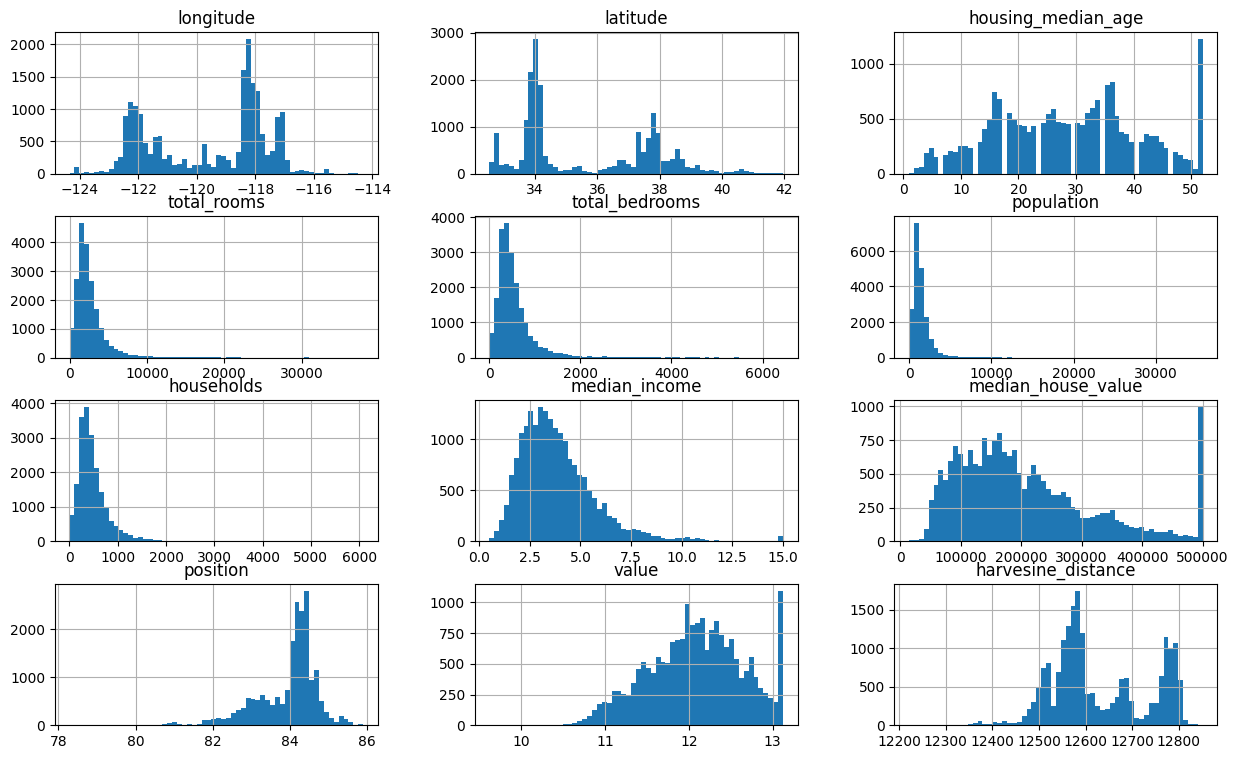

In [35]:
df.hist(bins=60, figsize=(15,9));plt.show()